**Problem: Customer Segmentation**


Segmentation is the process of dividing your customers up into different groups, with each group sharing similar characteristics, to improve engagement, sales and loyalty. 

Customer Segmentation Benefits
- helps to detect and exploit new market opportunities.
- improves how to predict customer behaviour.
- increased customer retention and loyalty
- improves the perception of a brand through personalization.
- streamlines and improves workflow.
- helps to improve customer lifetime value.
- Email marketers have withnessed a 760% increase in revenue by segmenting their email campaings.


In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os 
path_Data = '//content//gdrive//MyDrive//'
checkFile = os.path.isfile(path_Data + 'E-Commerce Data.csv')
print(checkPath,checkFile)

True True


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv(path_Data + 'E-Commerce Data.csv', encoding='cp1252')

In [ ]:
print(data.shape)
display(data.head())

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Datast has negative values in Quantity and UnitPrice. remove those entries 
#from dataset
df=data[(data.Quantity > 0)]
df=df[(df.UnitPrice > 0)]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


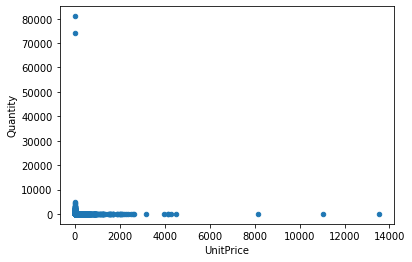

In [ ]:
plot = df.plot.scatter('UnitPrice','Quantity')

From this graph, we can see the distribution of Quantity and UnitPrice.

The many concentrated points are below 10000(quantity) and below 5000 (unitprice)

In [ ]:
#Based on the above graph we could see some of ouliers in the dataset
df=df[(df.Quantity<500)]
df=df[(df.UnitPrice<100)]

In [ ]:
#Check Null values are present in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131591
Country             0
dtype: int64

Customer column has 131591 null values. Customer Id id unique values since we
can't replace with any other values, hence remove it from the dataset

In [ ]:
df=df.dropna(how='any',axis='rows')
df.shape

(397262, 8)

In [ ]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


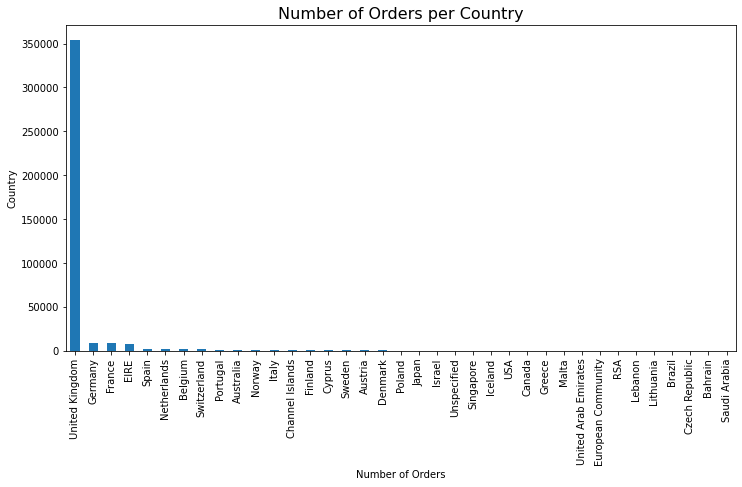

In [ ]:
ord_cnty=df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
#Plot
plt.figure(figsize=(12,6))
ord_cnty.plot.bar()
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders per Country',fontsize=16)
plt.show()

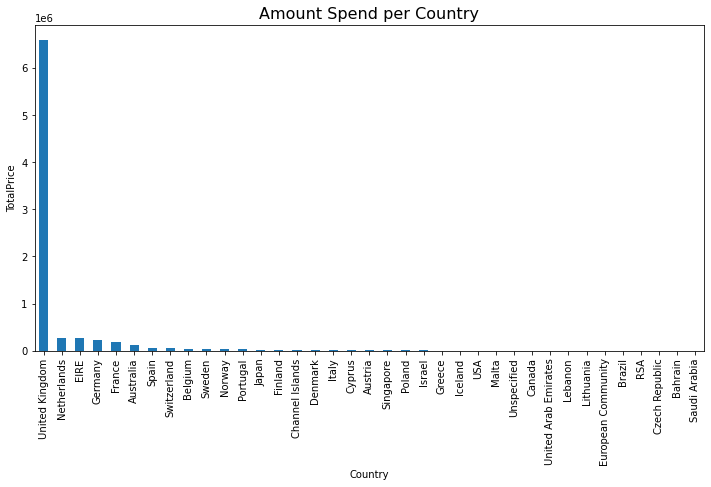

In [ ]:
amt_cnty = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
#Plot
plt.figure(figsize=(12,6))
amt_cnty.plot.bar()
plt.xlabel('Country')
plt.ylabel('TotalPrice')
plt.title('Amount Spend per Country',fontsize=16)
plt.show()

In [ ]:
dfg=df.groupby(by=['CustomerID'])['Quantity','TotalPrice'].agg({'Quantity':'sum','TotalPrice':'sum'}).reset_index()
dfg.rename(columns={'Quantity':'Total_Quantity','TotalPrice':'Total_Amount'},inplace=True)
dfg.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CustomerID,Total_Quantity,Total_Amount
0,12347.0,2458,4310.00
1,12348.0,2341,1797.24
2,12349.0,630,1457.55


Feature Scaling: reduce the influence of values 

For example: 500 is big but 1 is very small so when we calculate, it will affect to our result

In [ ]:
X = dfg.iloc[:,[1,2]].values
# Feature Scaling
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

**K-means**: This algorithm is an iterative algorithm that partitions the dataset according to their features into K number of predefined non- overlapping distinct clusters or subgroups. It makes the data points of inter clusters as similar as possible and also tries to keep the clusters as far as possible. It allocates the data points to a cluster if the sum of the squared distance between the cluster’s centroid and the data points is at a minimum where the cluster’s centroid is the arithmetic mean of the data points that are in the cluster. A less variation in the cluster results in similar or homogeneous data points within the cluster.

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

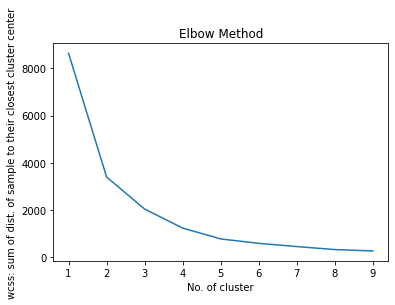

In [ ]:
wcss=[]
for n_clusters in range(1,10):
  kmeans=KMeans(n_clusters=n_clusters,init='k-means++')
  #KModes(n_clusters=4,init="Huang",n_init=5,verbase=1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  clusters=kmeans.predict(X)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center')


In [ ]:
#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [ ]:
plt.scatter(X[y_kmeas == 0,0], X[y_kmeans == 0,1]s=50)